In [43]:
import glob, re, os, sys
import numpy as np
from matplotlib import pyplot as plt

In [30]:
def analyse_path_py(path):
    all_code = ""
    for f in glob.glob(f"{path}/**/*.py", recursive=True):
        if "venv" not in f and "tests" not in f:
            with open(f) as file:
                all_code += file.read()

    num_lines = all_code.count('\n')

    matches = re.sub(r'((?:""")[\s\S]*?(?:"""|$))|(?:"[^"].*?["\n])|(#.*?\n)|.',r'\1\n\2',all_code)
    matches = [line for line in matches.splitlines() if line != ""]
    num_comments = len(matches)
    return num_lines, num_comments
event_lines, event_comments = analyse_path_py("Mymobiconf/event")
feedback_lines, feedback_comments = analyse_path_py("Mymobiconf/feedback")
user_lines, user_comments = analyse_path_py("Mymobiconf/user")

In [31]:
event_comments/event_lines

0.06417112299465241

In [32]:
feedback_comments/feedback_lines

0.02531645569620253

In [33]:
user_comments/user_lines

0.02717391304347826

In [34]:
all_code = ""
for f in glob.glob("Auth/auth/**/*.js*", recursive=True):
    if "node_modules" not in f and "package-lock.json" not in f and "package.json" not in f:
        with open(f) as file:
            all_code += file.read()

auth_lines = all_code.count('\n')

matches = re.sub(r'(?:"[^"].*?["\n])|(//.*?\n)|.',r'\1',all_code)
matches = [line for line in matches.splitlines() if line != ""]
auth_comments = len(matches)
auth_comments/auth_lines

0.06338028169014084

In [35]:
total_msa_lines = event_lines + feedback_lines + user_lines + auth_lines
total_msa_comments = event_comments + feedback_comments + user_comments + auth_comments
total_msa_comments/total_msa_lines

0.04696762425900593

In [37]:
total_mon_lines, total_mon_comments = analyse_path("../OLD-MMC")
total_mon_comments/total_mon_lines

0.07562717451016297

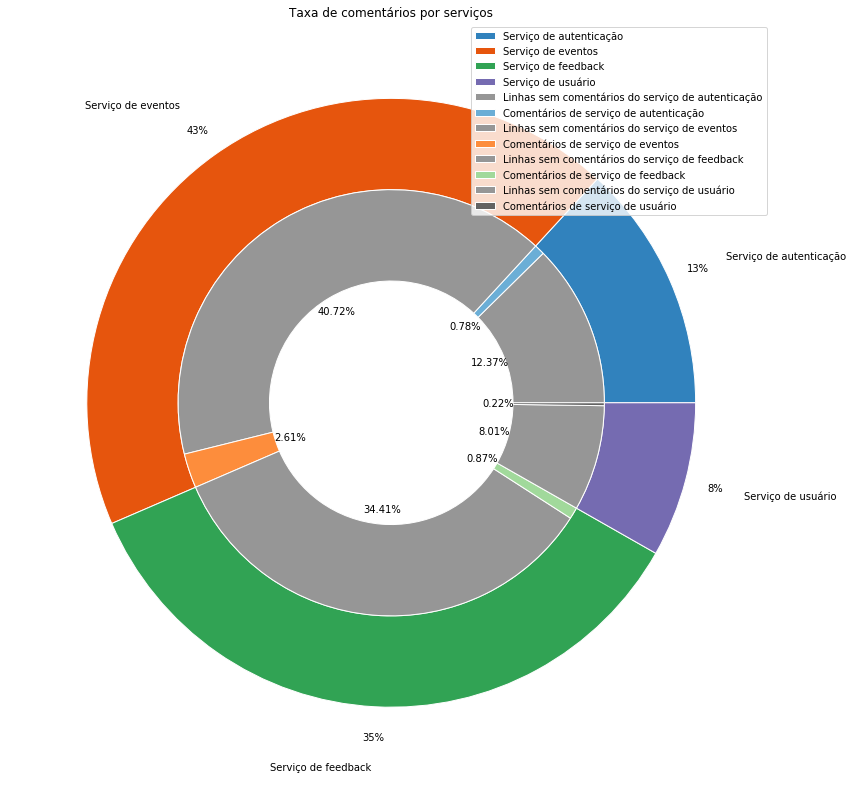

In [179]:
vals = np.array([[auth_lines, auth_comments], 
                 [event_lines, event_comments], 
                 [feedback_lines, feedback_comments],
                 [user_lines, user_comments]
                ])
plt.rcParams["figure.figsize"] = [14,14]
fig, ax = plt.subplots()

size = 0.3

cmap = plt.get_cmap("tab20c")
outer_colors = cmap(np.arange(4)*4)
inner_colors = cmap(np.array([17, 1, 17, 5, 17, 10, 17, 16]))

ax.pie(vals.sum(axis=1), radius=1, colors=outer_colors,
       wedgeprops=dict(width=size, edgecolor='w'),
       autopct='%1.0f%%', pctdistance=1.1, labeldistance=1.2, labels=[
                                                                       "Serviço de autenticação",
                                                                       "Serviço de eventos",
                                                                       "Serviço de feedback",
                                                                       "Serviço de usuário",
                                                                     ]
      )

ax.pie(vals.flatten(), radius=1-size, colors=inner_colors,
       wedgeprops=dict(width=size, edgecolor='w'),
       autopct='%1.2f%%', pctdistance=.5)

ax.set(aspect="equal", title='Taxa de comentários por serviços')
plt.legend([
                                                     "Serviço de autenticação",
                                                     "Serviço de eventos",
                                                     "Serviço de feedback",
                                                     "Serviço de usuário",
                                                     "Linhas sem comentários do serviço de autenticação",
                                                     "Comentários de serviço de autenticação",
                                                     "Linhas sem comentários do serviço de eventos",
                                                     "Comentários de serviço de eventos",
                                                     "Linhas sem comentários do serviço de feedback",
                                                     "Comentários de serviço de feedback",
                                                     "Linhas sem comentários do serviço de usuário",
                                                     "Comentários de serviço de usuário",
                                                 ],loc='upper right')
plt.show()

### total_mon_comments

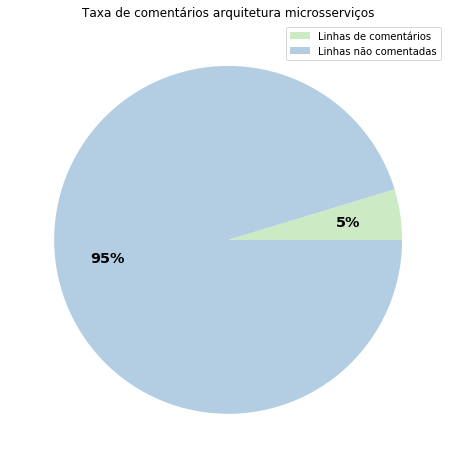

In [186]:
plt.rcParams["figure.figsize"] = [8,8]
cmap = plt.get_cmap("Pastel1")

plt.title('Taxa de comentários arquitetura microsserviços')
plt.pie(np.array([total_msa_comments,total_msa_lines-total_msa_comments]), colors=cmap(np.arange(2,0,-1)),
       autopct='%1.0f%%', pctdistance=.7,textprops=dict(weight="heavy",size="x-large"))
plt.legend(["Linhas de comentários","Linhas não comentadas",]);

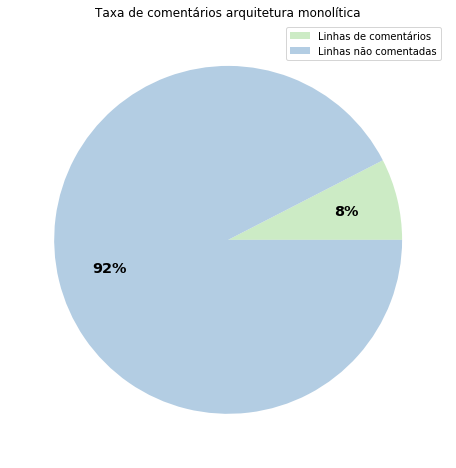

In [187]:
plt.rcParams["figure.figsize"] = [8,8]
plt.title('Taxa de comentários arquitetura monolítica')
plt.pie(np.array([total_mon_comments,total_mon_lines-total_mon_comments]),colors=cmap(np.arange(2,0,-1)),
       autopct='%1.0f%%', pctdistance=.7,textprops=dict(weight="heavy",size="x-large"))
plt.legend(["Linhas de comentários","Linhas não comentadas",]);